In [ ]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd  # For handling data
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization
from scipy.stats import chi2_contingency, ttest_ind, levene  # For statistical tests
import numpy as np

# Load NBA game data
file_path = '/content/final_data.csv'
nba_data = pd.read_csv(file_path)


In [ ]:
# Calculate win flags for home and away teams
nba_data['home_win'] = nba_data['PTS_home'] > nba_data['PTS_away']
nba_data['away_win'] = nba_data['PTS_away'] > nba_data['PTS_home']


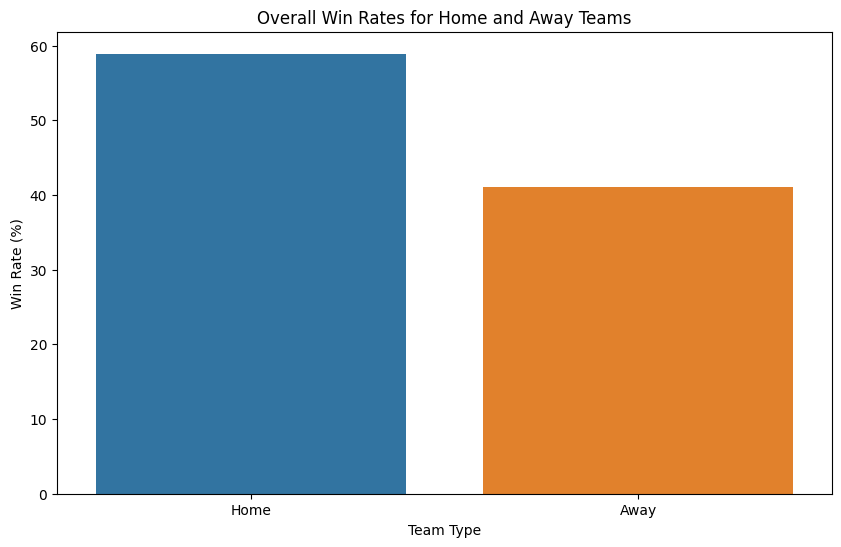

In [ ]:
# Calculate and visualize win rates for home and away teams
total_games = len(nba_data)
home_wins = nba_data['home_win'].sum()
away_wins = nba_data['away_win'].sum()

home_win_rate = (home_wins / total_games) * 100
away_win_rate = (away_wins / total_games) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=['Home', 'Away'], y=[home_win_rate, away_win_rate])
plt.title('Overall Win Rates for Home and Away Teams')
plt.ylabel('Win Rate (%)')
plt.xlabel('Team Type')
plt.show()


In [ ]:
# Perform chi-squared test to examine the difference in win rates between home and away teams
home_losses = len(nba_data) - home_wins
away_losses = len(nba_data) - away_wins
contingency_table = [[home_wins, away_wins], [home_losses, away_losses]]

chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Output the chi-squared statistic and p-value
chi2, p_value


(349.17287765860755, 6.415903348093515e-78)

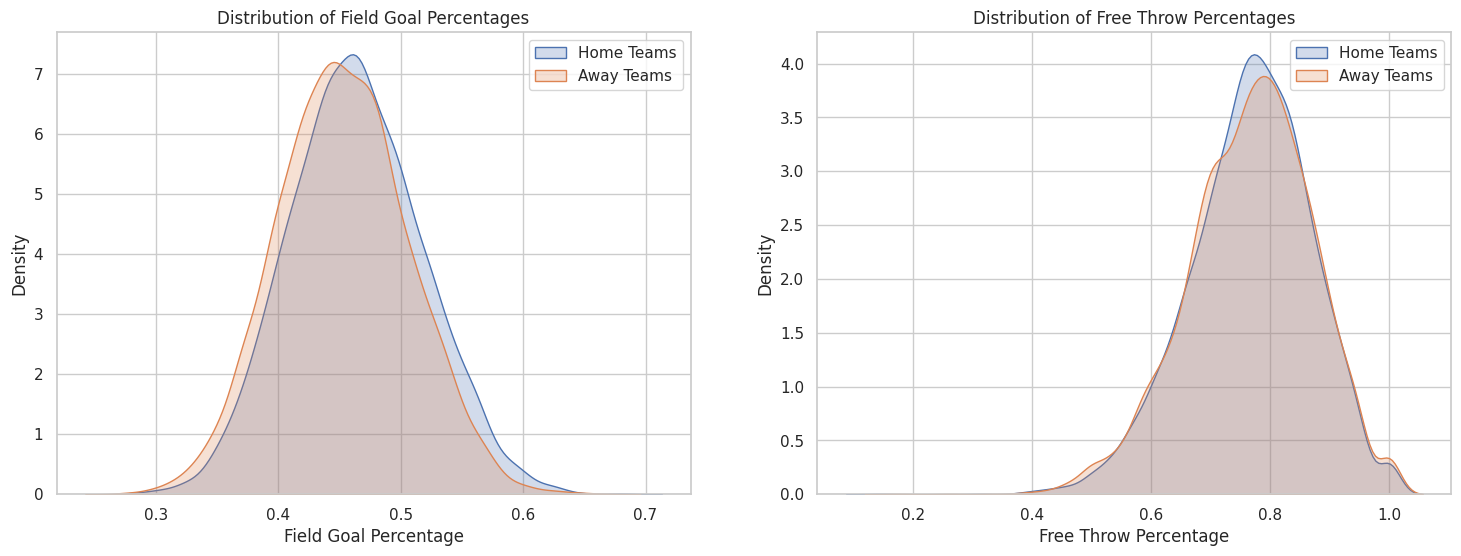

In [ ]:
# Visualize the distribution of field goal and free throw percentages for home and away teams
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot field goal percentages
sns.kdeplot(nba_data['FG_PCT_home'], ax=axes[0], label='Home Teams', fill=True)
sns.kdeplot(nba_data['FG_PCT_away'], ax=axes[0], label='Away Teams', fill=True)
axes[0].set_title('Distribution of Field Goal Percentages')
axes[0].set_xlabel('Field Goal Percentage')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot free throw percentages
sns.kdeplot(nba_data['FT_PCT_home'], ax=axes[1], label='Home Teams', fill=True)
sns.kdeplot(nba_data['FT_PCT_away'], ax=axes[1], label='Away Teams', fill=True)
axes[1].set_title('Distribution of Free Throw Percentages')
axes[1].set_xlabel('Free Throw Percentage')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.show()


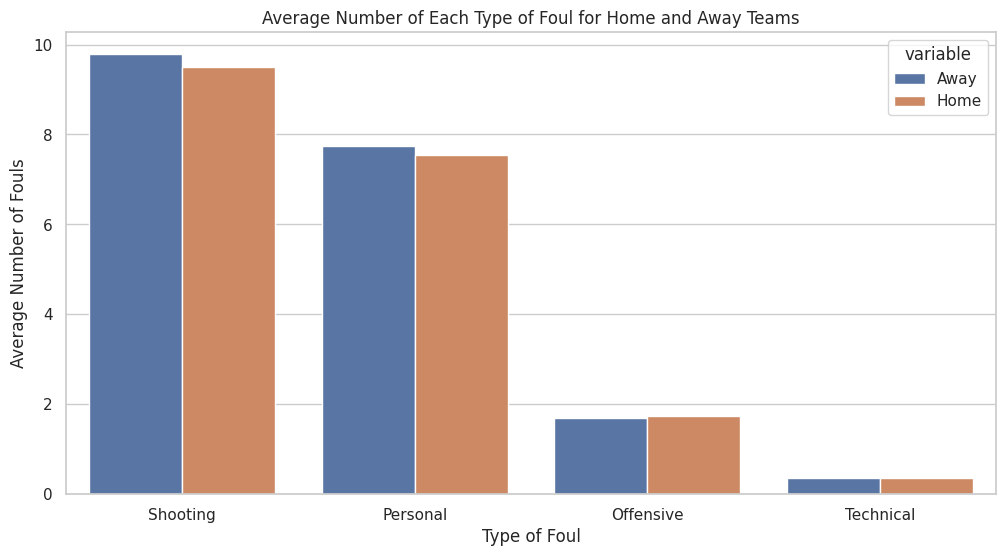

In [ ]:
# Analyze average fouls by type for home and away teams
foul_types_home = ['Home_shooting', 'Home_personal', 'Home_offensive', 'Home_technical']
foul_types_away = ['Away_shooting', 'Away_personal', 'Away_offensive', 'Away_technical']

avg_fouls_home = nba_data[foul_types_home].mean()
avg_fouls_away = nba_data[foul_types_away].mean()

# Create a DataFrame for easier plotting
fouls_df = pd.DataFrame({
    'Foul_Type': ['Shooting', 'Personal', 'Offensive', 'Technical'],
    'Away': avg_fouls_home.values,
    'Home': avg_fouls_away.values
})

# Plot average fouls for visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Foul_Type', y='value', hue='variable', data=fouls_df.melt(id_vars='Foul_Type', var_name='variable'))
plt.title('Average Number of Each Type of Foul for Home and Away Teams')
plt.ylabel('Average Number of Fouls')
plt.xlabel('Type of Foul')
plt.show()


In [ ]:
# Calculate the point differential between home and away teams
nba_data['point_differential'] = nba_data['PTS_home'] - nba_data['PTS_away']


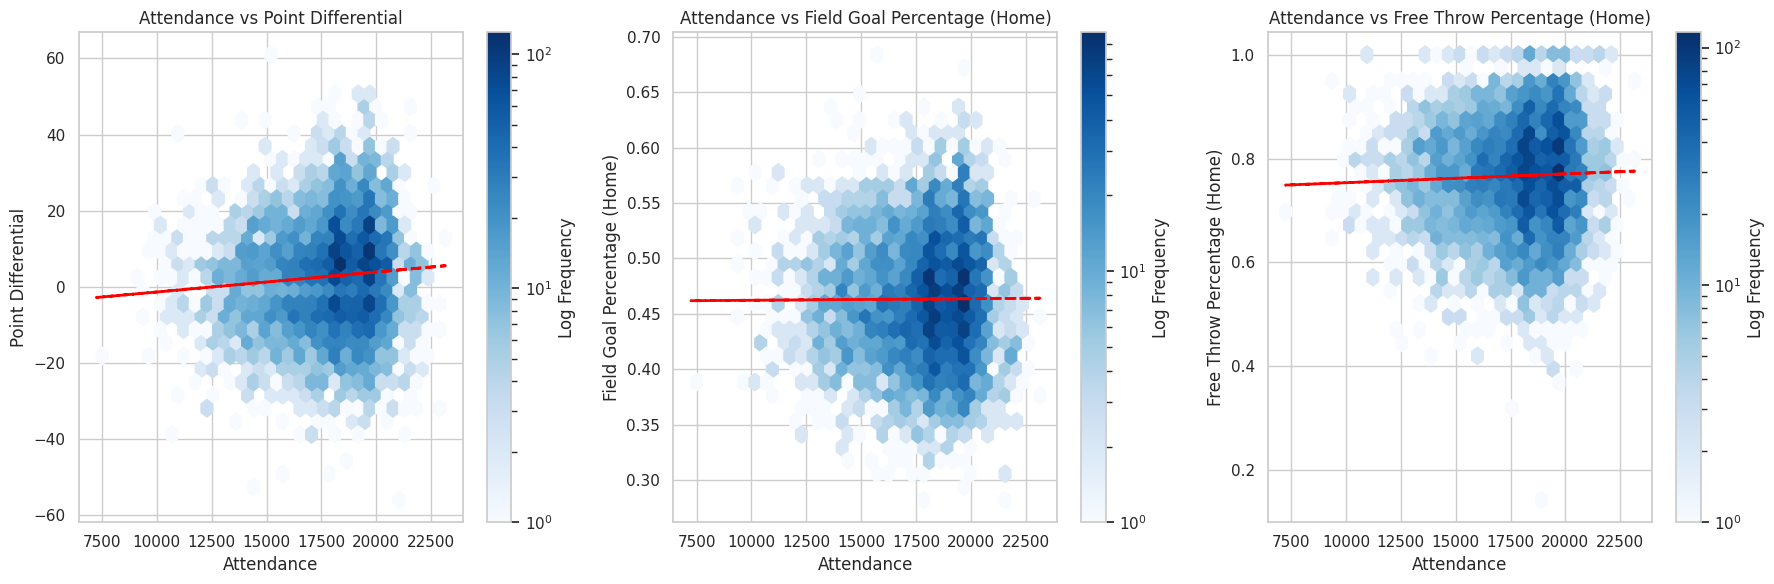

In [ ]:
# Function to add a line of best fit
def add_best_fit_line(ax, x, y, color='red'):
    # Calculate the coefficients of the linear fit
    coeffs = np.polyfit(x, y, 1)
    # Generate y-values based on the coefficients
    best_fit_y = np.polyval(coeffs, x)
    # Plot the line of best fit
    ax.plot(x, best_fit_y, color=color, linestyle='--', linewidth=2)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Hexbin plot for Attendance vs Point Differential
hb1 = axes[0].hexbin(nba_data['Attendance'], nba_data['point_differential'], gridsize=30, cmap='Blues', bins='log')
add_best_fit_line(axes[0], nba_data['Attendance'], nba_data['point_differential'])
axes[0].set_title('Attendance vs Point Differential')
axes[0].set_xlabel('Attendance')
axes[0].set_ylabel('Point Differential')
cb1 = plt.colorbar(hb1, ax=axes[0])
cb1.set_label('Log Frequency')

# Hexbin plot for Attendance vs Field Goal Percentage
hb2 = axes[1].hexbin(nba_data['Attendance'], nba_data['FG_PCT_home'], gridsize=30, cmap='Blues', bins='log')
add_best_fit_line(axes[1], nba_data['Attendance'], nba_data['FG_PCT_home'])
axes[1].set_title('Attendance vs Field Goal Percentage (Home)')
axes[1].set_xlabel('Attendance')
axes[1].set_ylabel('Field Goal Percentage (Home)')
cb2 = plt.colorbar(hb2, ax=axes[1])
cb2.set_label('Log Frequency')

# Hexbin plot for Attendance vs Free Throw Percentage
hb3 = axes[2].hexbin(nba_data['Attendance'], nba_data['FT_PCT_home'], gridsize=30, cmap='Blues', bins='log')
add_best_fit_line(axes[2], nba_data['Attendance'], nba_data['FT_PCT_home'])
axes[2].set_title('Attendance vs Free Throw Percentage (Home)')
axes[2].set_xlabel('Attendance')
axes[2].set_ylabel('Free Throw Percentage (Home)')
cb3 = plt.colorbar(hb3, ax=axes[2])
cb3.set_label('Log Frequency')

plt.tight_layout()
plt.show()


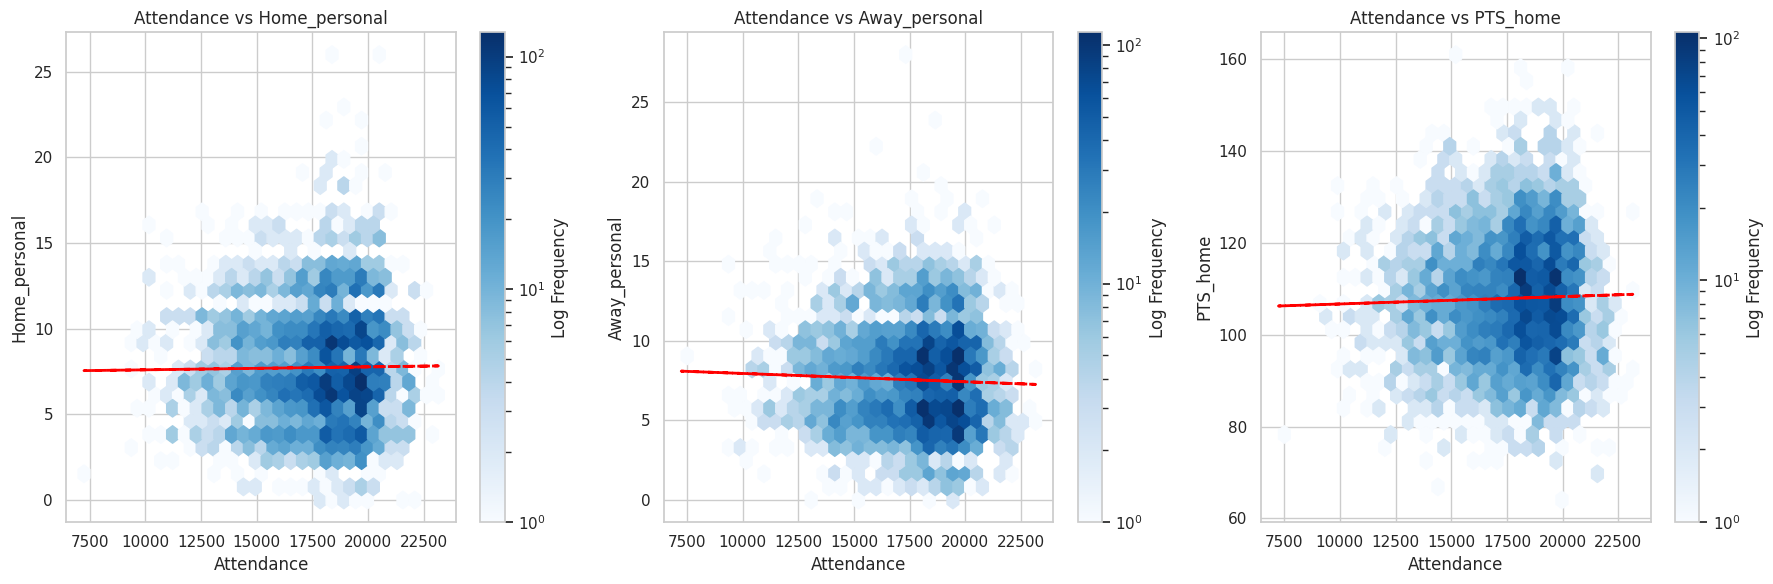

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Hexbin plot for Attendance vs Point Differential
hb1 = axes[0].hexbin(nba_data['Attendance'], nba_data['Home_personal'], gridsize=30, cmap='Blues', bins='log')
add_best_fit_line(axes[0], nba_data['Attendance'], nba_data['Home_personal'])
axes[0].set_title('Attendance vs Home_personal')
axes[0].set_xlabel('Attendance')
axes[0].set_ylabel('Home_personal')
cb1 = plt.colorbar(hb1, ax=axes[0])
cb1.set_label('Log Frequency')


hb2 = axes[1].hexbin(nba_data['Attendance'], nba_data['Away_personal'], gridsize=30, cmap='Blues', bins='log')
add_best_fit_line(axes[1], nba_data['Attendance'], nba_data['Away_personal'])
axes[1].set_title('Attendance vs Away_personal')
axes[1].set_xlabel('Attendance')
axes[1].set_ylabel('Away_personal')
cb2 = plt.colorbar(hb2, ax=axes[1])
cb2.set_label('Log Frequency')

hb3 = axes[2].hexbin(nba_data['Attendance'], nba_data['PTS_home'], gridsize=30, cmap='Blues', bins='log')
add_best_fit_line(axes[2], nba_data['Attendance'], nba_data['PTS_home'])
axes[2].set_title('Attendance vs PTS_home')
axes[2].set_xlabel('Attendance')
axes[2].set_ylabel('PTS_home')
cb3 = plt.colorbar(hb3, ax=axes[2])
cb3.set_label('Log Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Separate data into regular season and playoffs for comparative analysis
regular_season_data = nba_data[nba_data['Playoffs?'] == 0]
playoff_data = nba_data[nba_data['Playoffs?'] == 1]

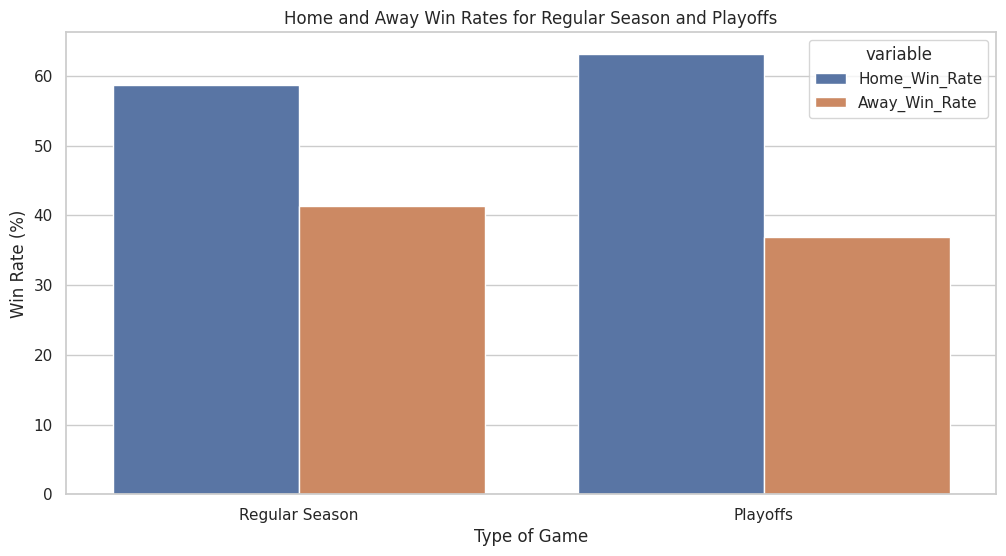

,Game_Type,Home_Win_Rate,Away_Win_Rate
0,Regular Season,58.650686,41.349314
1,Playoffs,63.109756,36.890244


In [ ]:
# Define a function to calculate win rates for home and away teams within a dataset
def calculate_win_rates(dataset):
    total_games = len(dataset)
    home_wins = dataset['home_win'].sum()
    away_wins = dataset['away_win'].sum()

    home_win_rate = (home_wins / total_games) * 100
    away_win_rate = (away_wins / total_games) * 100

    return home_win_rate, away_win_rate

# Calculate win rates for regular season and playoffs
regular_home_win_rate, regular_away_win_rate = calculate_win_rates(regular_season_data)
playoff_home_win_rate, playoff_away_win_rate = calculate_win_rates(playoff_data)

# Prepare data for visualization
win_rates_df = pd.DataFrame({
    'Game_Type': ['Regular Season', 'Playoffs'],
    'Home_Win_Rate': [regular_home_win_rate, playoff_home_win_rate],
    'Away_Win_Rate': [regular_away_win_rate, playoff_away_win_rate]
})

# Visualize home and away win rates for regular season and playoffs
plt.figure(figsize=(12, 6))
sns.barplot(x='Game_Type', y='value', hue='variable', data=win_rates_df.melt(id_vars='Game_Type', var_name='variable'))
plt.title('Home and Away Win Rates for Regular Season and Playoffs')
plt.ylabel('Win Rate (%)')
plt.xlabel('Type of Game')
plt.show()


<ipython-input-18-4dc5eb326947>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['FG_PCT_home'], ax=axes[0], label='Home Teams', shade=True)
<ipython-input-18-4dc5eb326947>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['FG_PCT_away'], ax=axes[0], label='Away Teams', shade=True)
<ipython-input-18-4dc5eb326947>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['FT_PCT_home'], ax=axes[1], label='Home Teams', shade=True)
<ipython-input-18-4dc5eb326947>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update 

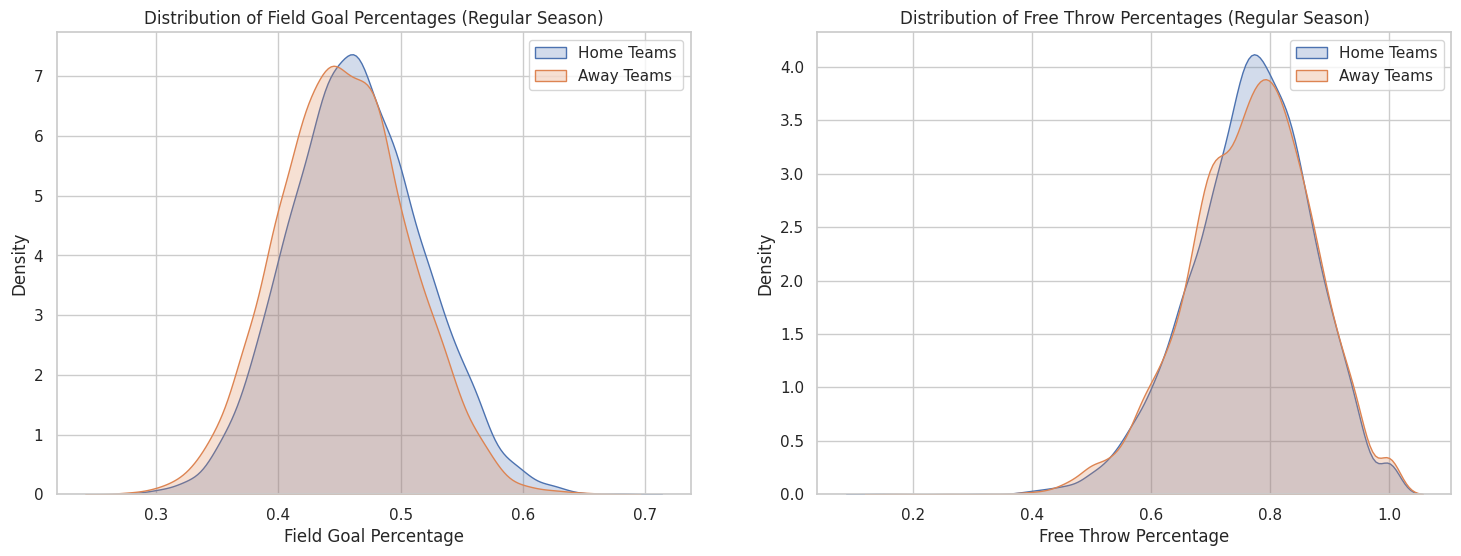

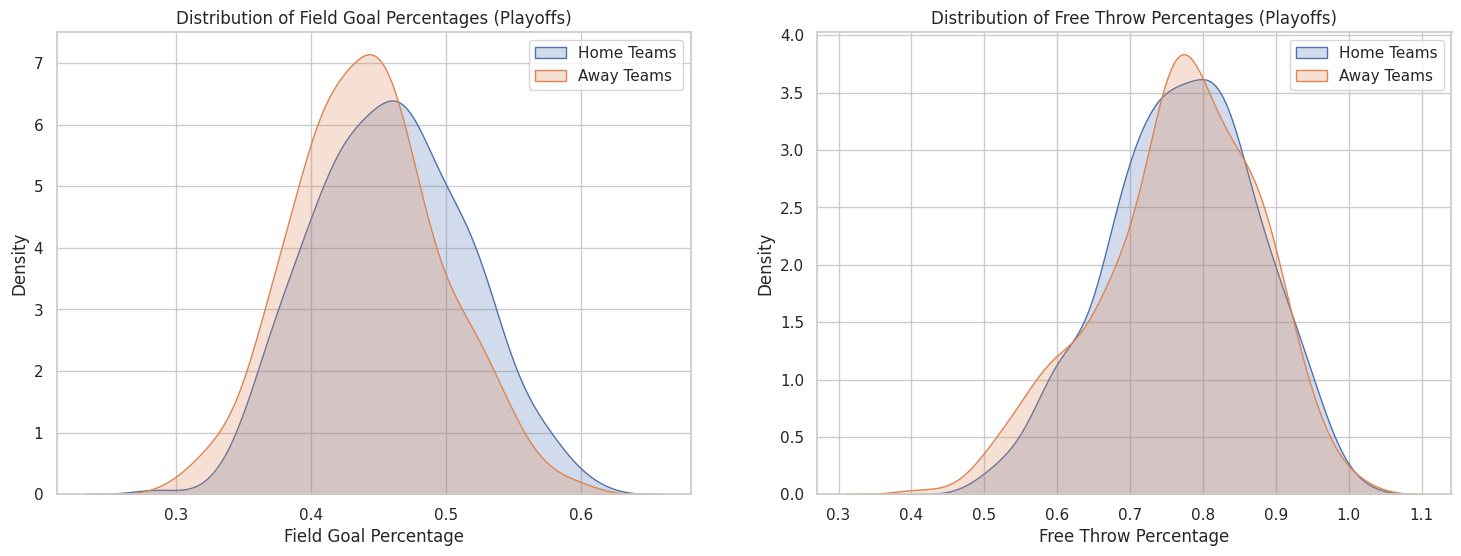

In [ ]:
# Function to plot shooting percentages for home and away teams
def plot_shooting_percentages(dataset, game_type):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot field goal percentages
    sns.kdeplot(dataset['FG_PCT_home'], ax=axes[0], label='Home Teams', shade=True)
    sns.kdeplot(dataset['FG_PCT_away'], ax=axes[0], label='Away Teams', shade=True)
    axes[0].set_title(f'Distribution of Field Goal Percentages ({game_type})')
    axes[0].set_xlabel('Field Goal Percentage')
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Plot free throw percentages
    sns.kdeplot(dataset['FT_PCT_home'], ax=axes[1], label='Home Teams', shade=True)
    sns.kdeplot(dataset['FT_PCT_away'], ax=axes[1], label='Away Teams', shade=True)
    axes[1].set_title(f'Distribution of Free Throw Percentages ({game_type})')
    axes[1].set_xlabel('Free Throw Percentage')
    axes[1].set_ylabel('Density')
    axes[1].legend()

# Call the function for regular season and playoffs data
plot_shooting_percentages(regular_season_data, 'Regular Season')
plot_shooting_percentages(playoff_data, 'Playoffs')


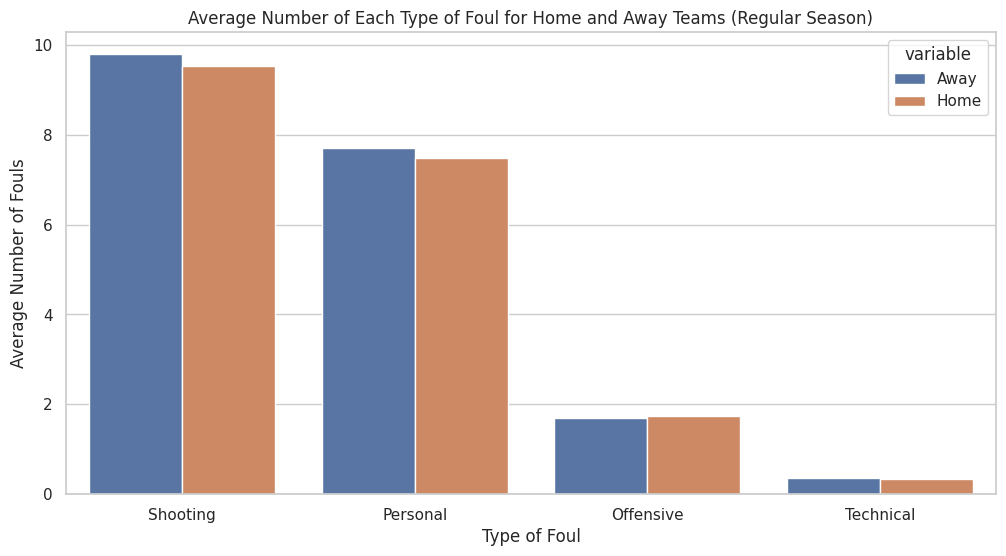

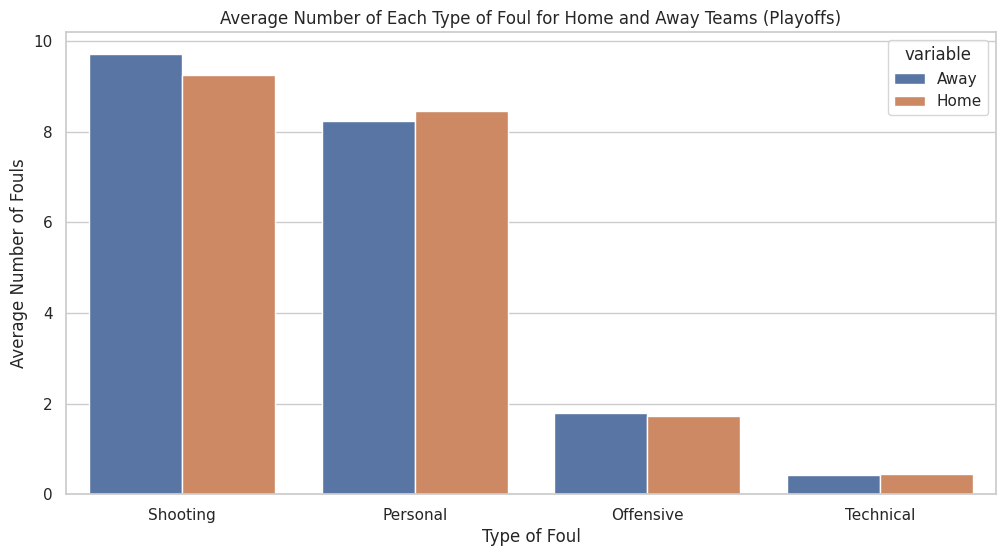

In [ ]:
def plot_fouls(dataset, game_type):
    avg_fouls_home = dataset[foul_types_home].mean()
    avg_fouls_away = dataset[foul_types_away].mean()

    fouls_df = pd.DataFrame({
        'Foul_Type': ['Shooting', 'Personal', 'Offensive', 'Technical'],
        'Away': avg_fouls_home.values,
        'Home': avg_fouls_away.values
    })

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Foul_Type', y='value', hue='variable', data=fouls_df.melt(id_vars='Foul_Type', var_name='variable'))
    plt.title(f'Average Number of Each Type of Foul for Home and Away Teams ({game_type})')
    plt.ylabel('Average Number of Fouls')
    plt.xlabel('Type of Foul')
    plt.show()

plot_fouls(regular_season_data, 'Regular Season')
plot_fouls(playoff_data, 'Playoffs')


In [ ]:
def perform_chi_square_test(dataset, game_type):
    home_wins = dataset['home_win'].sum()
    away_wins = dataset['away_win'].sum()
    home_losses = len(dataset) - home_wins
    away_losses = len(dataset) - away_wins
    contingency_table = [[home_wins, away_wins], [home_losses, away_losses]]

    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    return chi2, p_value

chi2_regular, p_value_regular = perform_chi_square_test(regular_season_data, 'Regular Season')
chi2_playoff, p_value_playoff = perform_chi_square_test(playoff_data, 'Playoffs')

chi2_regular, p_value_regular, chi2_playoff, p_value_playoff


(309.0028996713706,
 3.601118372819613e-69,
 44.05487804878049,
 3.192971502813048e-11)

In [ ]:

# Function to perform two-sample t-tests for shooting percentages
def perform_t_tests(dataset, variable_home, variable_away, game_type):
    # Levene's test for equality of variances
    stat, p_value_levene = levene(dataset[variable_home], dataset[variable_away])

    # Two-sample t-test
    stat, p_value_ttest = ttest_ind(dataset[variable_home], dataset[variable_away], equal_var=(p_value_levene > 0.05))

    return stat, p_value_ttest, p_value_levene

stat_fg_regular, p_value_fg_regular, p_value_levene_fg_regular = perform_t_tests(regular_season_data, 'FG_PCT_home', 'FG_PCT_away', 'Regular Season')
stat_ft_regular, p_value_ft_regular, p_value_levene_ft_regular = perform_t_tests(regular_season_data, 'FT_PCT_home', 'FT_PCT_away', 'Regular Season')

stat_fg_playoff, p_value_fg_playoff, p_value_levene_fg_playoff = perform_t_tests(playoff_data, 'FG_PCT_home', 'FG_PCT_away', 'Playoffs')
stat_ft_playoff, p_value_ft_playoff, p_value_levene_ft_playoff = perform_t_tests(playoff_data, 'FT_PCT_home', 'FT_PCT_away', 'Playoffs')

stat_fg_regular, p_value_fg_regular, p_value_levene_fg_regular, stat_ft_regular, p_value_ft_regular, p_value_levene_ft_regular, stat_fg_playoff, p_value_fg_playoff, p_value_levene_fg_playoff, stat_ft_playoff, p_value_ft_playoff, p_value_levene_ft_playoff


(9.94482697226448,
 3.375655376892066e-23,
 0.35100829482793505,
 0.35405581580048207,
 0.7233042761353163,
 0.01598456923948842,
 3.9453879330404984,
 8.828723097378573e-05,
 0.29077182767849213,
 0.6957265994748828,
 0.4868472097643344,
 0.48123295575222436)

In [ ]:
stat_fouls_regular = []
p_value_fouls_regular = []
p_value_levene_fouls_regular = []

stat_fouls_playoff = []
p_value_fouls_playoff = []
p_value_levene_fouls_playoff = []

foul_types_home = ['Home_shooting', 'Home_personal', 'Home_offensive', 'Home_technical']
foul_types_away = ['Away_shooting', 'Away_personal', 'Away_offensive', 'Away_technical']

for foul_home, foul_away in zip(foul_types_home, foul_types_away):
    stat, p_value, p_value_levene = perform_t_tests(regular_season_data, foul_home, foul_away, 'Regular Season')
    stat_fouls_regular.append(stat)
    p_value_fouls_regular.append(p_value)
    p_value_levene_fouls_regular.append(p_value_levene)

    stat, p_value, p_value_levene = perform_t_tests(playoff_data, foul_home, foul_away, 'Playoffs')
    stat_fouls_playoff.append(stat)
    p_value_fouls_playoff.append(p_value)
    p_value_levene_fouls_playoff.append(p_value_levene)

stat_fouls_regular, p_value_fouls_regular, p_value_levene_fouls_regular, stat_fouls_playoff, p_value_fouls_playoff, p_value_levene_fouls_playoff


([4.627309825904179,
  3.8056728889038345,
  -1.890260646753967,
  0.10644598222748007],
 [3.749489414986404e-06,
  0.00014223457121992524,
  0.058751037668747404,
  0.9152305759297906],
 [0.23926634867897095,
  0.06751594806920896,
  0.6567839787714644,
  0.9152305759268811],
 [2.078995899969856,
  -0.8968652506149928,
  0.6369743464621178,
  -0.6925238930600571],
 [0.03800689717050609,
  0.3701208406148473,
  0.5243644514967924,
  0.4888542034358593],
 [0.22838803467363855,
  0.11967292922263578,
  0.4114880798914633,
  0.4888542034359604])

In [ ]:
from scipy.stats import ttest_ind

# Function to perform a two-sample t-test and return the results
def perform_ttest(sample1, sample2):
    t_stat, p_val = ttest_ind(sample1, sample2, equal_var=False, nan_policy='omit')
    return t_stat, p_val

t_stat_fg_pct, p_val_fg_pct = perform_ttest(final_nba_data['FG_PCT_home'], final_nba_data['FG_PCT_away'])
t_stat_ft_pct, p_val_ft_pct = perform_ttest(final_nba_data['FT_PCT_home'], final_nba_data['FT_PCT_away'])

foul_types_home = ['Home_shooting', 'Home_personal', 'Home_offensive', 'Home_technical']
foul_types_away = ['Away_shooting', 'Away_personal', 'Away_offensive', 'Away_technical']
t_stats_fouls = []
p_vals_fouls = []

for home_foul, away_foul in zip(foul_types_home, foul_types_away):
    t_stat, p_val = perform_ttest(final_nba_data[home_foul], final_nba_data[away_foul])
    t_stats_fouls.append(t_stat)
    p_vals_fouls.append(p_val)

t_stat_fg_pct, p_val_fg_pct, t_stat_ft_pct, p_val_ft_pct, t_stats_fouls, p_vals_fouls



(          count
 Away Win   2260
 Home Win   3241,
 0.0,
 1.0)

In [ ]:
from scipy.stats import pearsonr

# Function to perform Pearson correlation test and return the results
def perform_pearson_corr(x, y):
    corr_coeff, p_val = pearsonr(x, y)
    return corr_coeff, p_val

metrics = ['home_win', 'point_differential', 'FG_PCT_home', 'FT_PCT_home']
corr_coeffs = []
p_vals_corr = []

for metric in metrics:
    corr_coeff, p_val = perform_pearson_corr(nba_data['Attendance'], nba_data[metric])
    corr_coeffs.append(corr_coeff)
    p_vals_corr.append(p_val)

corr_coeffs, p_vals_corr


([0.06432889551597619,
  0.0801663372233292,
  0.005544297161023011,
  0.0354265244379909],
 [1.7965897241199857e-06,
  2.615576789705302e-09,
  0.6809822216510626,
  0.008594713968113808])